## BANK CLASSIFICATION PROJECT

Francesca, Kym & Nick

#### Import data/ tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from scipy import stats
#from scipy.stats import skew, kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_confusion_matrix, mean_squared_error, r2_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report, fbeta_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler, SMOTE
from sklearn import svm

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

import pymysql
from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
#Fran doc

#connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit_card_classification'
#engine = create_engine(connection_string)

In [3]:
#Fran doc
#query = '''select * from credit_card_classification.credit_card_data;'''

#data = pd.read_sql_query(query, engine)
#data.head()'''

In [4]:
#Kym doc
connection_string = 'mysql+pymysql://root:' + password + '@localhost/credit_card_classification'
engine = create_engine(connection_string)

In [5]:
query = 'select * From credit_card_classification.credit_card_data;'

data = pd.read_sql_query(query,engine)
data.head(3)

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0


### Explore

In [6]:
data.head(10)

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17976 non-null  int64  
 1   offer_accepted        17976 non-null  object 
 2   reward                17976 non-null  object 
 3   mailer_type           17976 non-null  object 
 4   income_level          17976 non-null  object 
 5   n_bank_accounts_open  17976 non-null  int64  
 6   overdraft_protection  17976 non-null  object 
 7   credit_rating         17976 non-null  object 
 8   n_credit_cards_held   17976 non-null  int64  
 9   n_homes_owned         17976 non-null  int64  
 10  household_size        17976 non-null  int64  
 11  own_your_home         17976 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [8]:
data.shape

(17976, 16)

In [9]:
data.describe()

,customer_number,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600
std,5196.958865,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000
25%,4498.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000
75%,13501.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000


In [10]:
print("---------- Data NA:")
print(data.isna().sum())
print("---------- Data null:")
print(data.isnull().sum())

---------- Data NA:
customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
n_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
n_credit_cards_held     0
n_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
dtype: int64
---------- Data null:
customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
n_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
n_credit_cards_held     0
n_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
dtype: int64


In [11]:
#Sort
data = data.set_index("customer_number")


##### DF categories

In [12]:
data['q1_balance'] = data['q1_balance'].astype("float64") 
data['q2_balance'] = data['q2_balance'].astype("float64") 
data['q3_balance'] = data['q3_balance'].astype("float64") 

In [13]:
cat = pd.DataFrame()
num = pd.DataFrame()


def dtype_cat(x):
    for i in x:
        if data[i].dtype == 'object':
            cat[i] = data[i]
        elif data[i].dtype == 'int64' or data[i].dtype == 'float64':
            num[i] = data[i]

df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def dtype_discrete_continuous(x):
    for i in x:            
        if data[i].dtype == 'int64':
            df_discr[i] = data[i]
        elif data[i].dtype == 'float64':
            df_cont[i] = data[i]
    
dtype_cat(list(data.columns))
dtype_discrete_continuous(list(data.columns))

### Explore

##### Multicollinearity

In [14]:
from itertools import combinations
from scipy.stats import chi2_contingency

def data_corr_mat(df,confidence):
    columns = df.columns
    chi = pd.DataFrame(index=columns, columns=columns)
    p = pd.DataFrame(index=columns, columns=columns)
    nh = pd.DataFrame(index=columns, columns=columns)
    dof = pd.DataFrame(index=columns, columns=columns)
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(cont_table)[0]
        p_stat= chi2_contingency(cont_table)[1]
        chi.loc[var2, var1] = chi2_stat
        chi.loc[var1, var2] = chi2_stat
        p.loc[var2, var1] = p_stat
        p.loc[var1, var2] = p_stat
        dof_stat= chi2_contingency(cont_table)[2]
        dof.loc[var2, var1] = dof_stat
        dof.loc[var1, var2] = dof_stat
        if p.loc[var2, var1] < confidence:
            nh.loc[var2, var1]='rejected'
        else:
            nh.loc[var2, var1]='accepted'
        if p.loc[var1, var2] < confidence:
            nh.loc[var1, var2]='rejected'
        else:
            nh.loc[var1, var2]='accepted'   
    chi.fillna(0, inplace=True)
    p.fillna(0, inplace=True)
    return chi,p,nh,dof

chi,p,nh,dof=data_corr_mat(cat,.05) 

#our level of confidence is 95%

In [15]:
nh

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,NaN,rejected,rejected,rejected,accepted,rejected,accepted
reward,rejected,NaN,accepted,accepted,accepted,accepted,accepted
mailer_type,rejected,accepted,NaN,accepted,accepted,accepted,accepted
income_level,rejected,accepted,accepted,NaN,accepted,accepted,accepted
overdraft_protection,accepted,accepted,accepted,accepted,NaN,accepted,accepted
credit_rating,rejected,accepted,accepted,accepted,accepted,NaN,accepted
own_your_home,accepted,accepted,accepted,accepted,accepted,accepted,NaN


In [16]:
p

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
offer_accepted,0.000000e+00,1.086582e-22,1.199365e-38,2.129367e-25,0.751952,2.269780e-97,0.978426
reward,1.086582e-22,0.000000e+00,6.675078e-01,6.596233e-01,0.436111,6.630119e-01,0.392192
mailer_type,1.199365e-38,6.675078e-01,0.000000e+00,5.854611e-01,0.713326,7.205223e-01,0.573949
income_level,2.129367e-25,6.596233e-01,5.854611e-01,0.000000e+00,0.543823,5.612726e-01,0.339349
overdraft_protection,7.519518e-01,4.361113e-01,7.133258e-01,5.438226e-01,0.000000,5.092904e-01,0.267121
credit_rating,2.269780e-97,6.630119e-01,7.205223e-01,5.612726e-01,0.509290,0.000000e+00,0.588657
own_your_home,9.784255e-01,3.921919e-01,5.739485e-01,3.393493e-01,0.267121,5.886572e-01,0.000000


In [17]:
# possible to drop: overdraft_protection and own_your_home as are the highest. 

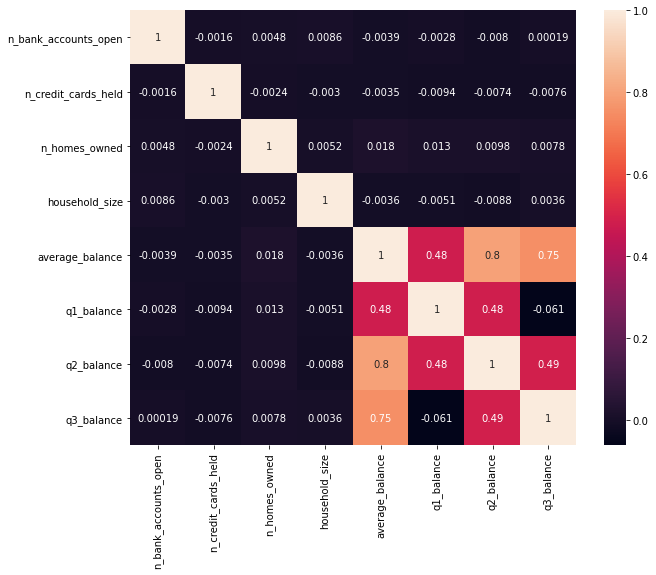

In [18]:
corr_matrix=num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [19]:
# high correlation between average_balance and quarters is not significant as it is normal that the average balance is highly correlated
# to the balance devided by the quarters, but what we can observe is that the correlation to q1 is related to q2 and q2 is correlated
# to q3 at the same extent. Who starts the year with balance and has balance in q2 is most likely to have balance in q3. 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = {}
num = add_constant(num)
#data_corr

for i in np.arange(num.shape[1]):
    column_name = num.columns[i]
    value = variance_inflation_factor(np.array(num), i)
    vif[column_name] = value
vif

{'const': 38.51620790032293,
 'n_bank_accounts_open': 1.0001946995695357,
 'n_credit_cards_held': 1.000667058038174,
 'n_homes_owned': 1.0005767895574504,
 'household_size': 1.0002878543477862,
 'average_balance': 9.83811068524177,
 'q1_balance': 2.827390437232375,
 'q2_balance': 3.0441195806738883,
 'q3_balance': 5.28503207324439}

In [21]:
#No vif over standard(10), as avg balance is highest it could be a possible column to drop.

#### Data types

In [22]:
cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
customer_number,,,,,,,
1,No,Air Miles,Letter,High,No,High,No
2,No,Air Miles,Letter,Medium,No,Medium,Yes
3,No,Air Miles,Postcard,High,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
5,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,Yes
17998,No,Cash Back,Letter,High,No,Low,No


In [23]:
df_cont

,average_balance,q1_balance,q2_balance,q3_balance
customer_number,,,,
1,1160.75,1669.0,877.0,1095.0
2,147.25,39.0,106.0,78.0
3,276.50,367.0,352.0,145.0
4,1219.00,1578.0,1760.0,1119.0
5,1211.00,2140.0,1357.0,982.0
...,...,...,...,...
17996,167.50,136.0,65.0,71.0
17997,850.50,984.0,940.0,943.0
17998,1087.25,918.0,767.0,1170.0


In [24]:
df_discr

,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size
customer_number,,,,
1,1,2,1,4
2,1,2,2,5
3,2,2,1,2
4,2,1,1,4
5,1,2,1,6
...,...,...,...,...
17996,1,1,1,5
17997,1,3,1,3
17998,1,2,1,4


#### PLOTTING

In [25]:
# MASTER PLOT FUNCTION

def plot_df(df, plot_type):
    import matplotlib.pyplot as plt
    import seaborn as sns

    if plot_type == 'displot':
        cols=list(df.columns)
    
        for col in cols:
            sns.distplot(df[col])
            plt.show()

    elif plot_type == 'histplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.histplot(df[col])
            plt.show()

    elif plot_type == 'boxplot':
        cols=list(df.columns)
    
        for col in cols:
            sns.boxplot(df[col])
            plt.show()
    
    
    elif plot_type == 'displot_hue_offer':
        cols=list(df.columns)

        for col in cols:
            temp_df = data.copy()
            temp_df["offer_accepted"] = data.offer_accepted.map({"Yes":1,"No":0})
            sns.displot(data=temp_df, x=df[col], hue="offer_accepted", palette = "Set2",fill=True,height=6,aspect=2, multiple="stack")
            
        
    elif plot_type == 'dist_box_plot':
        cols=list(df.columns)

        for col in cols:
            ax = sns.distplot(df[col])
            ax2 = ax.twinx()
            sns.boxplot(x=df[col], ax=ax2)
            ax2.set(ylim=(-.5, 10))
            


In [26]:
def plot_exclude(data, exclude):
    
    for i in data:
        
        if i != exclude:
        
            if len(data[i].unique()) > 10:
            
                sns.distplot(data[i], label = i)
                plt.show()
        
            else:
                sns.countplot(data[i], label = i)
                plt.show()

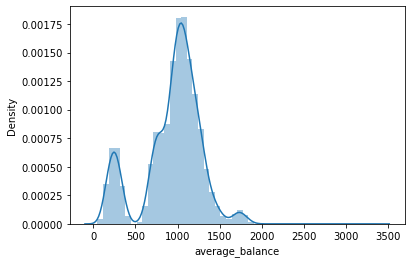

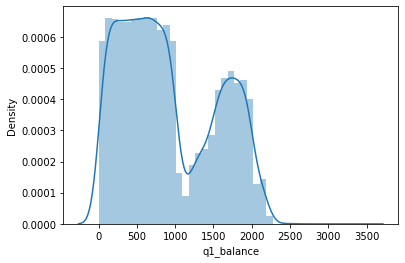

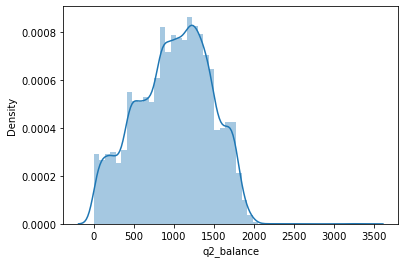

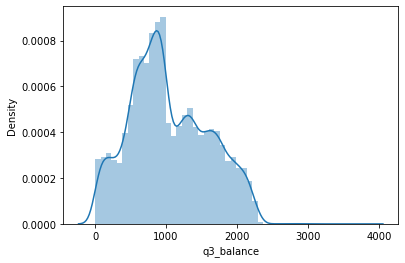

In [27]:
plot_df(df_cont,'displot')

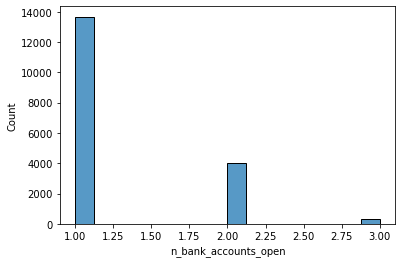

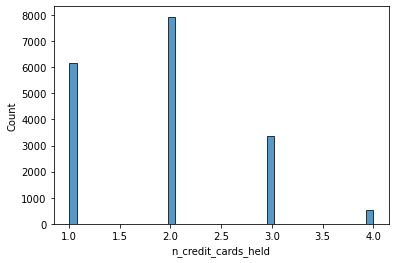

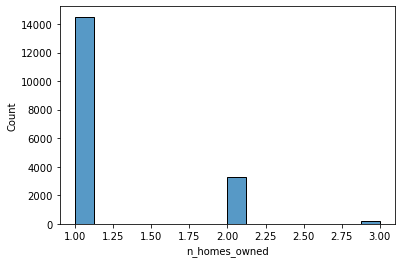

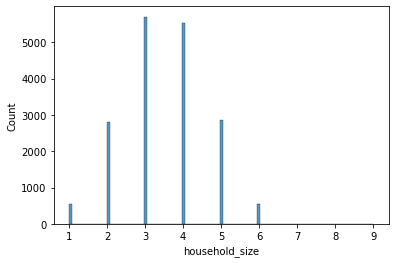

In [28]:
plot_df(df_discr,'histplot')

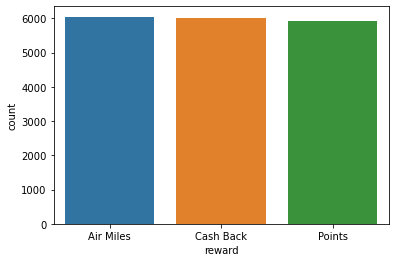

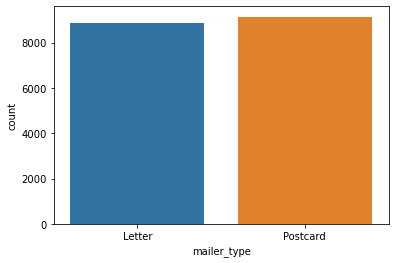

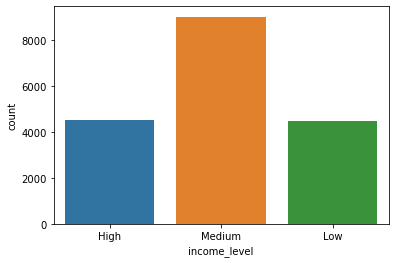

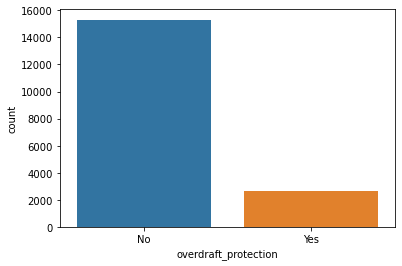

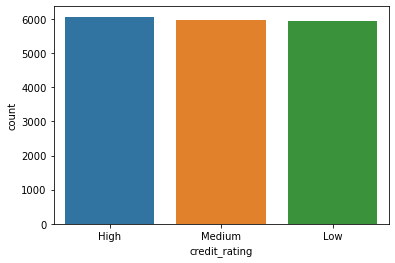

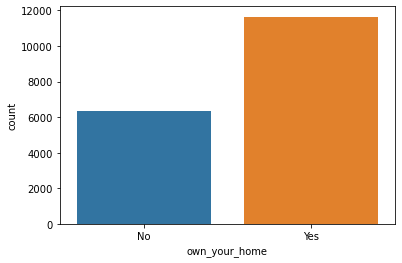

In [29]:
plot_exclude(cat,'offer_accepted')


In [30]:
#Check the number of unique classes
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print("Number of classes in {}".format(col))
    print("Number of values: ", data[col].nunique())
    print("Unique values: ",data[col].unique())
    print('--------------------------')

Number of classes in offer_accepted
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------
Number of classes in reward
Number of values:  3
Unique values:  ['Air Miles' 'Cash Back' 'Points']
--------------------------
Number of classes in mailer_type
Number of values:  2
Unique values:  ['Letter' 'Postcard']
--------------------------
Number of classes in income_level
Number of values:  3
Unique values:  ['High' 'Medium' 'Low']
--------------------------
Number of classes in overdraft_protection
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------
Number of classes in credit_rating
Number of values:  3
Unique values:  ['High' 'Medium' 'Low']
--------------------------
Number of classes in own_your_home
Number of values:  2
Unique values:  ['No' 'Yes']
--------------------------


#### Comparing to target: offers accepted 

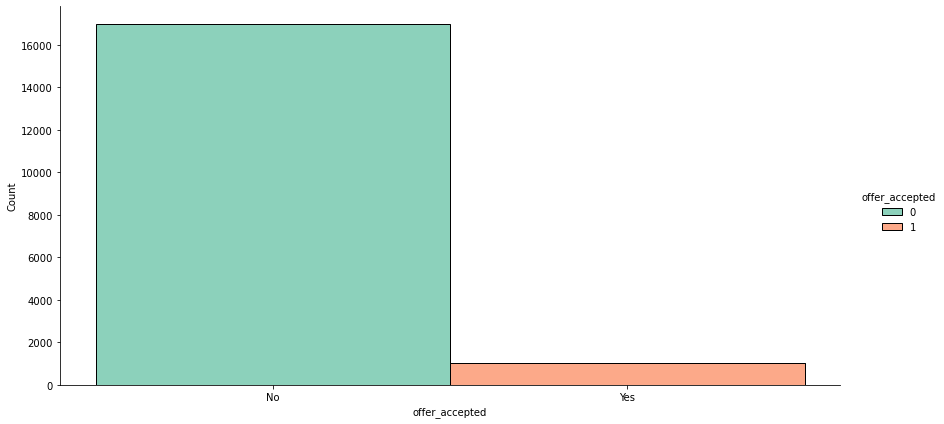

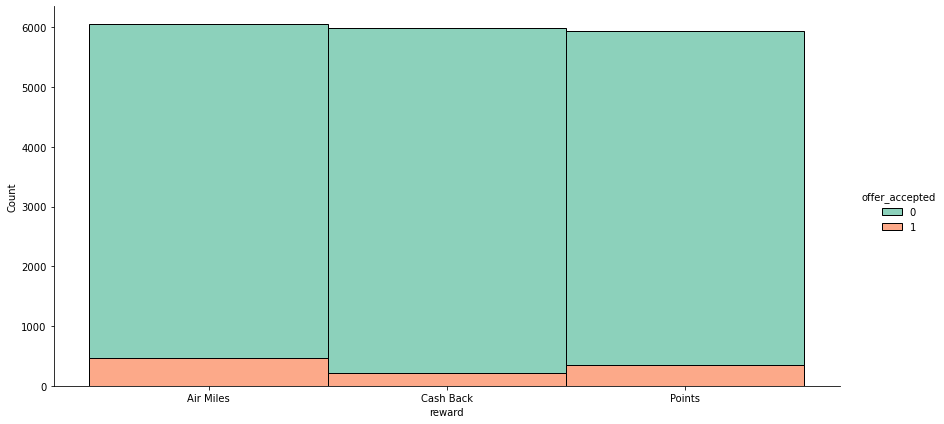

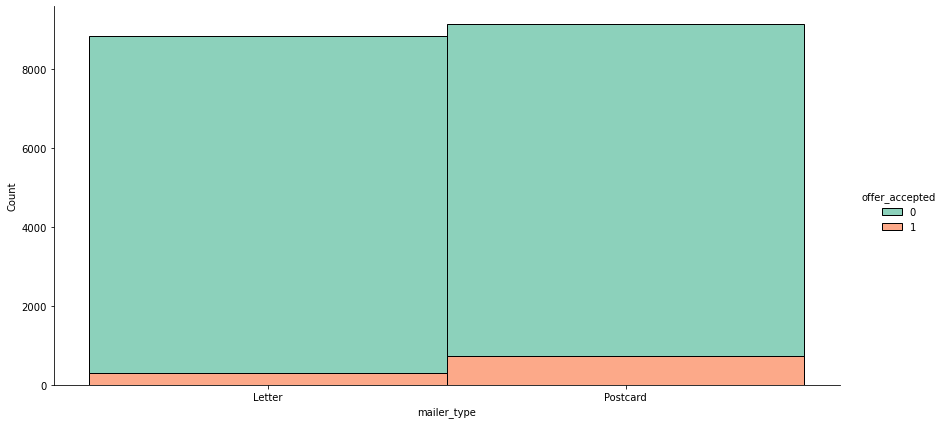

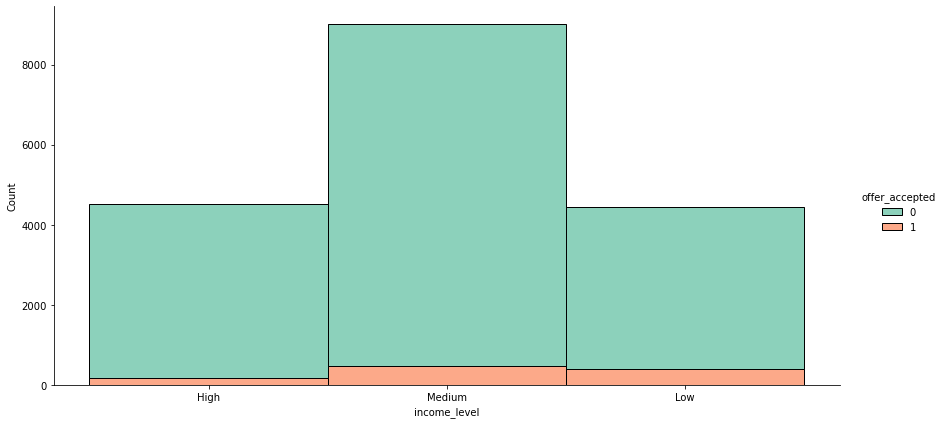

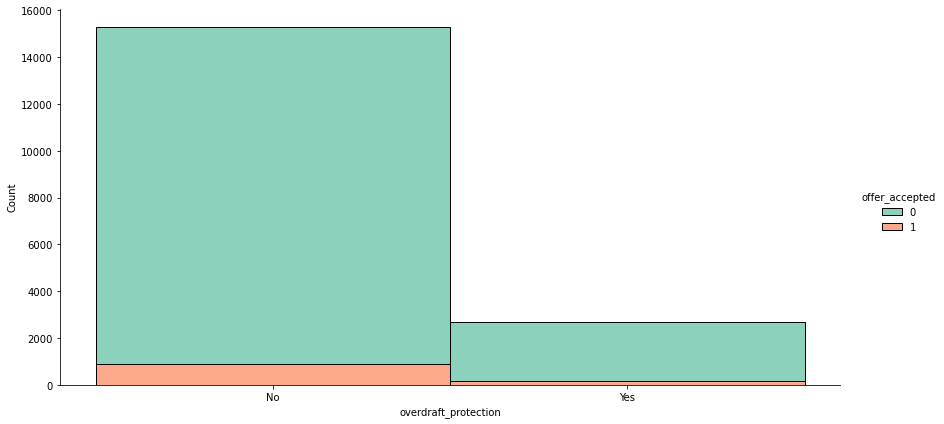

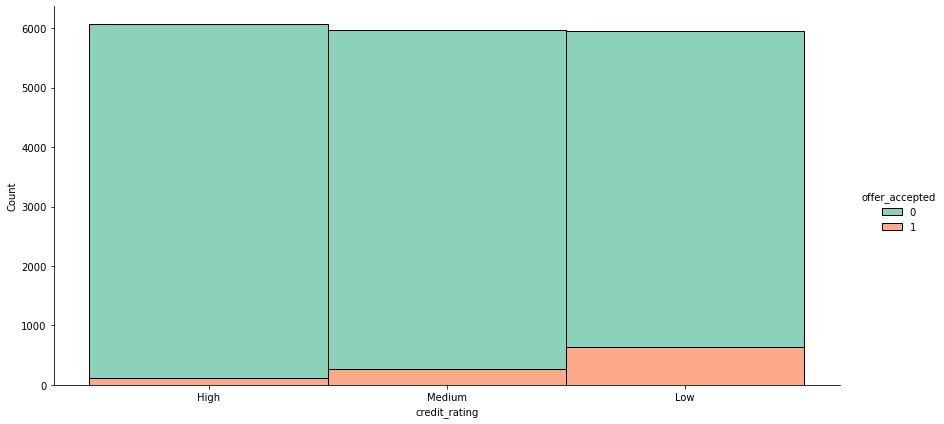

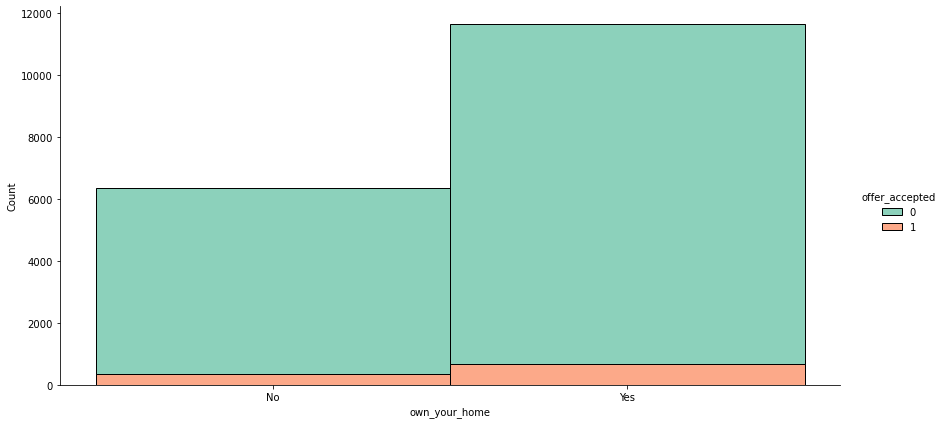

In [31]:
plot_df(cat,'displot_hue_offer')

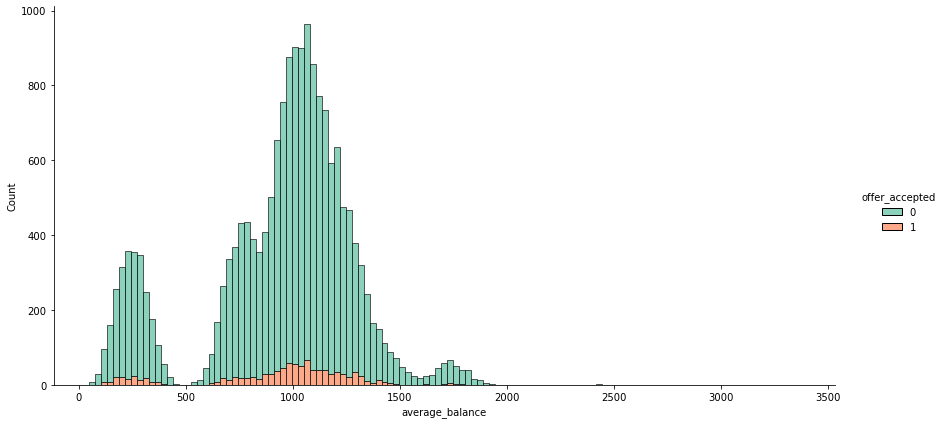

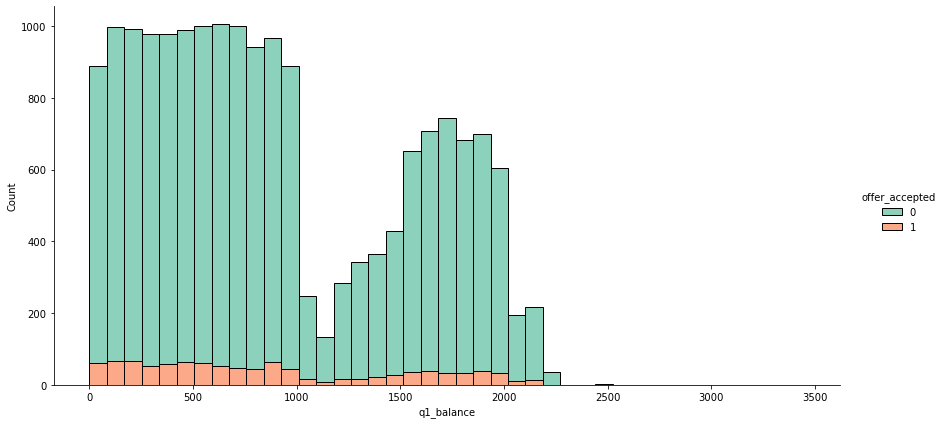

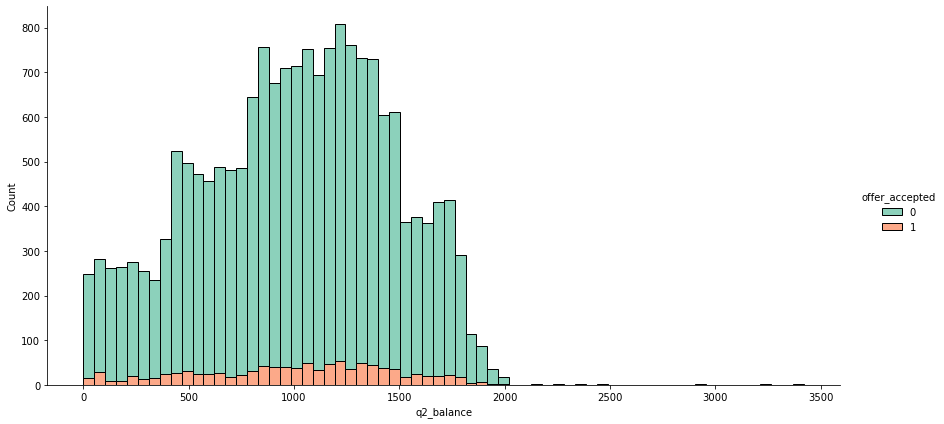

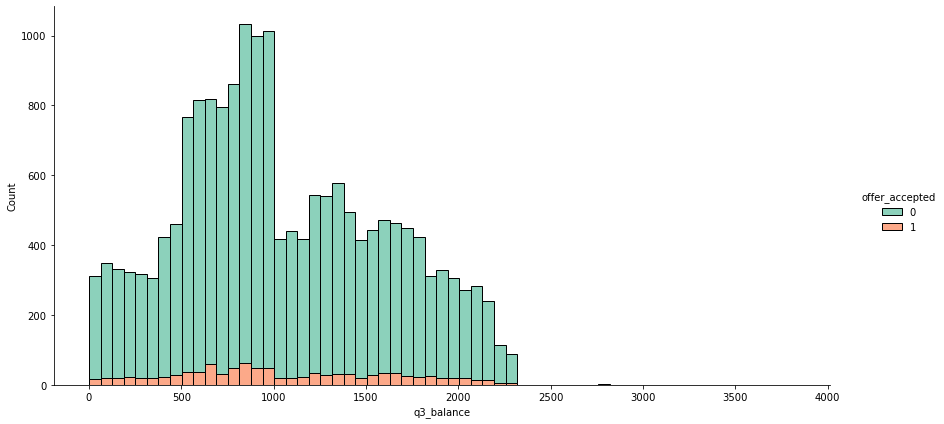

In [32]:
plot_df(df_cont,'displot_hue_offer')

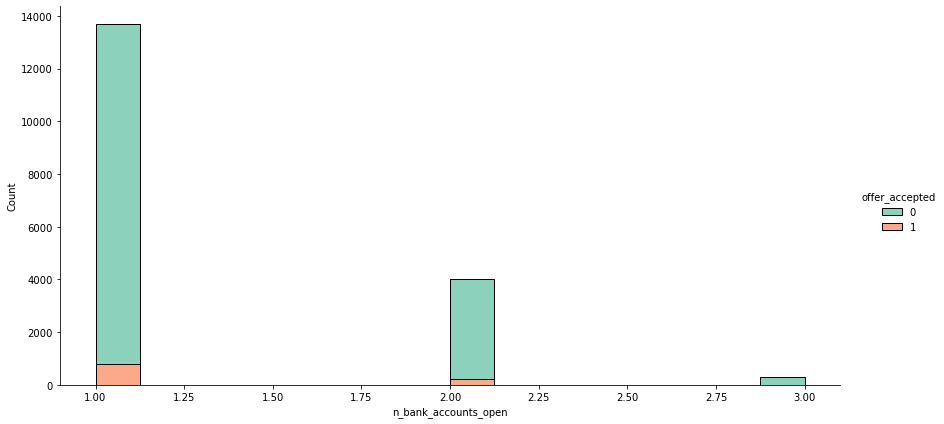

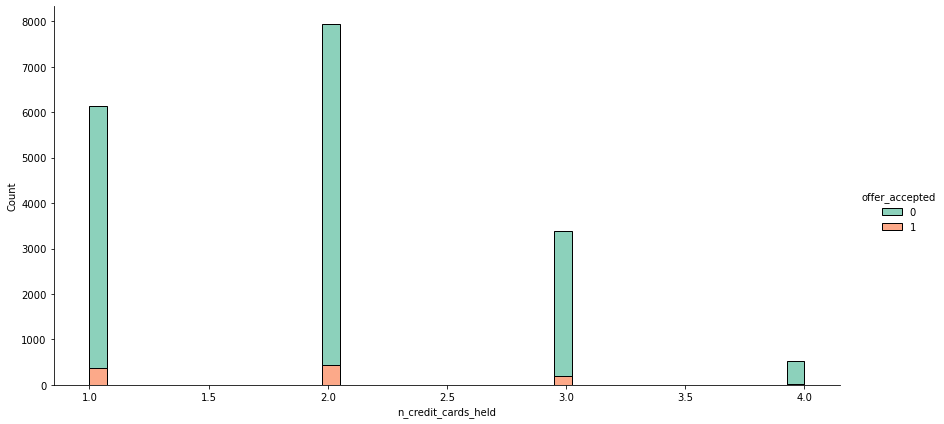

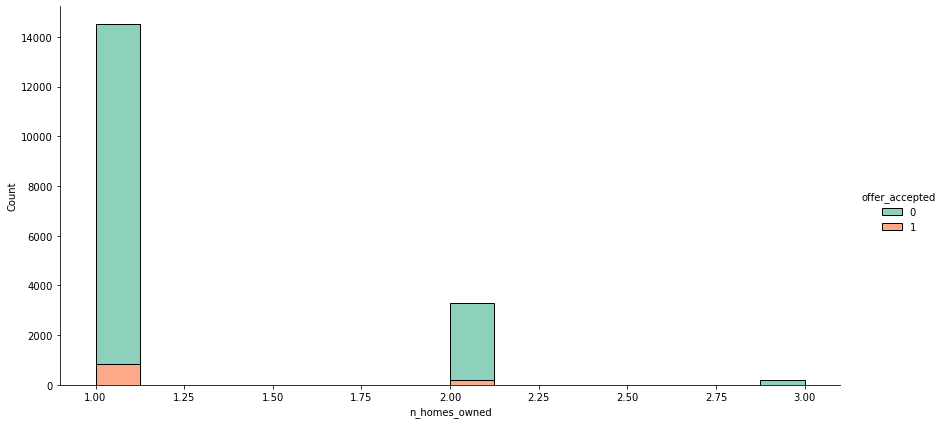

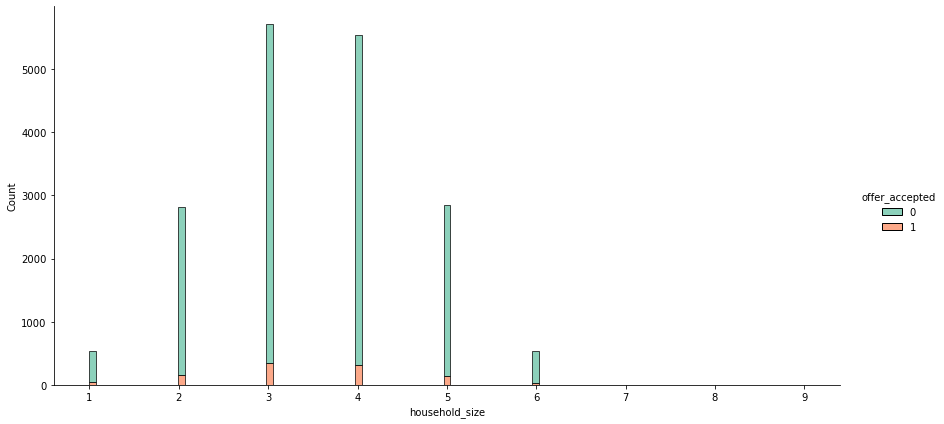

In [33]:
plot_df(df_discr,'displot_hue_offer')

#### Exploring: plotting box plot with dsiplot for IQR 

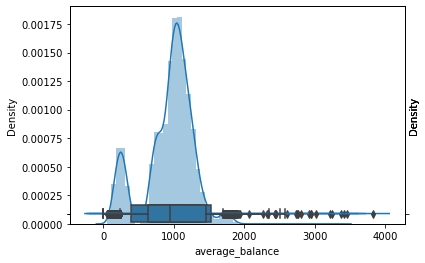

In [34]:
#trying function to apply to all df_cont ( not working)
plot_df(df_cont,'dist_box_plot')

[(-0.5, 10.0)]

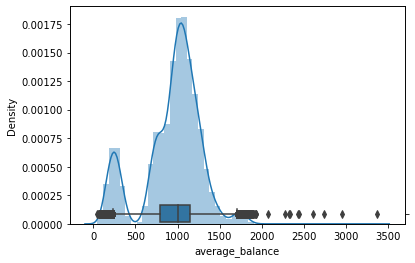

In [35]:
#Outlier inspections:

ax = sns.distplot(data['average_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['average_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

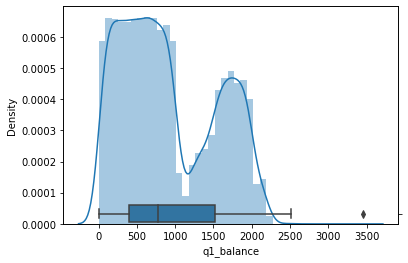

In [36]:
ax = sns.distplot(data['q1_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q1_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

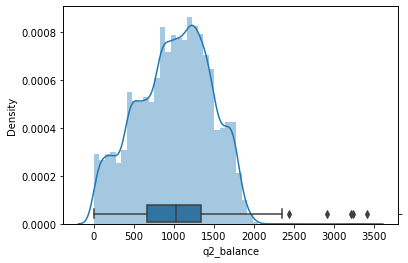

In [37]:
ax = sns.distplot(data['q2_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q2_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

[(-0.5, 10.0)]

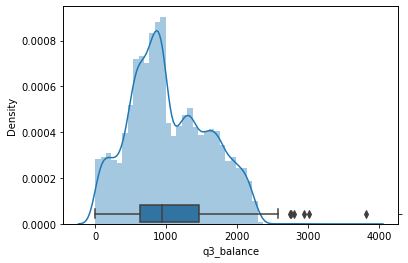

In [38]:
ax = sns.distplot(data['q3_balance'])
ax2 = ax.twinx()
sns.boxplot(x=data['q3_balance'], ax=ax2)
ax2.set(ylim=(-.5, 10))

In [39]:
#checking data

data.head(3)

,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance
customer_number,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0


In [40]:
dtype_cat(list(data.columns))

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 1 to 18000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   n_bank_accounts_open  17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   n_credit_cards_held   17976 non-null  int64  
 8   n_homes_owned         17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_your_home         17976 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
dtypes: float64(4), int6

## Prepare for Modeling

#### DATA ENGINEERING

The upper wisker is at: 1701.88
The number of points outise the upper wisker is:  278


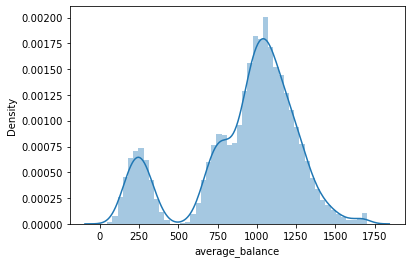

The upper wisker is at: 3154.50
The number of points outise the upper wisker is:  0


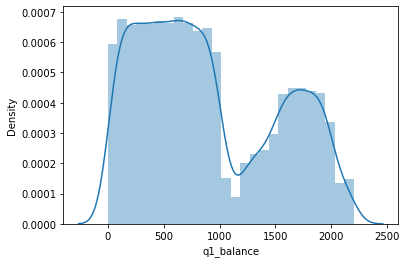

The upper wisker is at: 2332.00
The number of points outise the upper wisker is:  0


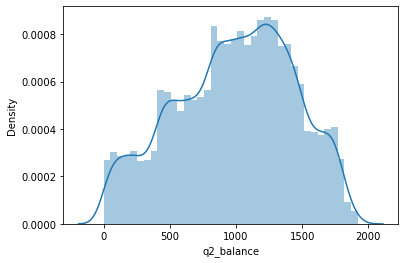

The upper wisker is at: 2634.88
The number of points outise the upper wisker is:  0


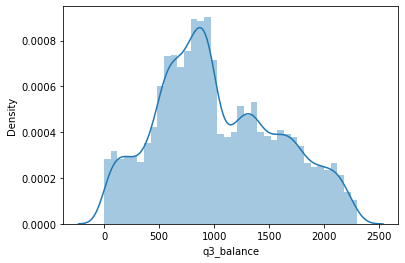

In [42]:
iqr = np.percentile(data['average_balance'],75) - np.percentile(data['average_balance'],25)
upper_limit = np.percentile(data['average_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['average_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['average_balance'] < upper_limit]
sns.distplot(data['average_balance'])
plt.show()

iqr = np.percentile(data['q1_balance'],75) - np.percentile(data['q1_balance'],25)
upper_limit = np.percentile(data['q1_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q1_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q1_balance'] < upper_limit]
sns.distplot(data['q1_balance'])
plt.show()

iqr = np.percentile(data['q2_balance'],75) - np.percentile(data['q2_balance'],25)
upper_limit = np.percentile(data['q2_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q2_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q2_balance'] < upper_limit]
sns.distplot(data['q2_balance'])
plt.show()

#Q4
iqr = np.percentile(data['q3_balance'],75) - np.percentile(data['q3_balance'],25)
upper_limit = np.percentile(data['q3_balance'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['q3_balance'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))
data = data[data['q3_balance'] < upper_limit]
sns.distplot(data['q3_balance'])
plt.show()

#### Binning

In [43]:
#to do: #Binning q1/q2..
#avg_bins = [0, 500, 1000, 1500, 2000, 2500, 3000,3500]
#avg_bal_label = 1,2,3,4,5,6,7

#data['avg_bal_bin'] = pd.cut(data['average_balance'], avg_bins, labels = avg_bal_label)

#NOTES for binning: 
avg_bal_label7 = [1,2,3,4,5,6,7] #group labels
data['avg_bal_bin7'] = pd.cut(data['average_balance'],7, labels=avg_bal_label7) #7 = make 7 groups
data['avg_bal_bin7'].head()


In [44]:
#Binning avg balance

avg_bins = [0, 500, 1000, 1500, 2000]
avg_bal_label = 1,2,3,4
data['avg_bal_bin4'] = pd.cut(data['average_balance'], avg_bins, labels = avg_bal_label)


#Binning household size
housesize_bins = [0,3,6,9]
housesize_label = 1,2,3

data['house_size_bin3'] = pd.cut(data['household_size'], housesize_bins, labels = housesize_label)

print("'household_size', 'average_balance' BINNED")
data.head(3)

'household_size', 'average_balance' BINNED


,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,avg_bal_bin4,house_size_bin3
customer_number,,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,3,2
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,1,2
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,1,1


In [45]:
data['average_balance'].max()

1700.75

In [46]:
data['avg_bal_bin4'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [47]:
data.drop(['household_size', 'average_balance'], axis=1, inplace= True) 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17698 entries, 1 to 18000
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   offer_accepted        17698 non-null  object  
 1   reward                17698 non-null  object  
 2   mailer_type           17698 non-null  object  
 3   income_level          17698 non-null  object  
 4   n_bank_accounts_open  17698 non-null  int64   
 5   overdraft_protection  17698 non-null  object  
 6   credit_rating         17698 non-null  object  
 7   n_credit_cards_held   17698 non-null  int64   
 8   n_homes_owned         17698 non-null  int64   
 9   own_your_home         17698 non-null  object  
 10  q1_balance            17698 non-null  float64 
 11  q2_balance            17698 non-null  float64 
 12  q3_balance            17698 non-null  float64 
 13  avg_bal_bin4          17698 non-null  category
 14  house_size_bin3       17698 non-null  category
dtypes:

In [49]:
#data.drop(['sumq1_q3'], axis=1, inplace= True) 

In [50]:
data['avg_bal_bin4'] = data['avg_bal_bin4'].astype(float)
data['house_size_bin3'] = data['house_size_bin3'].astype(float)

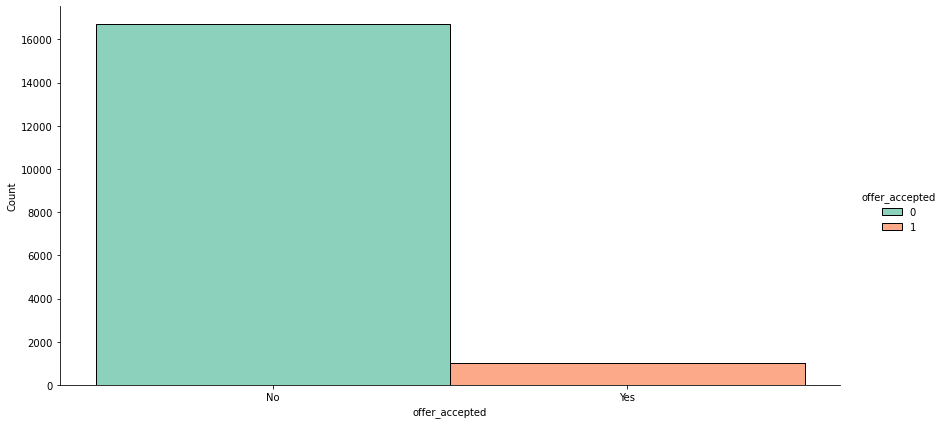

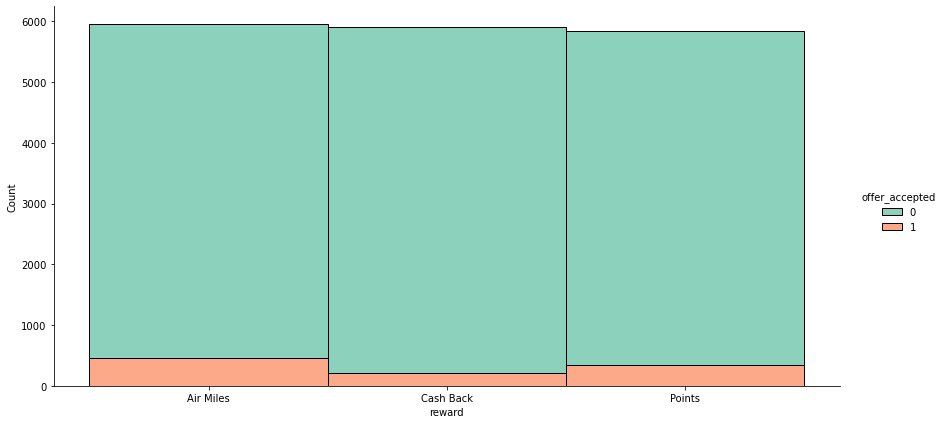

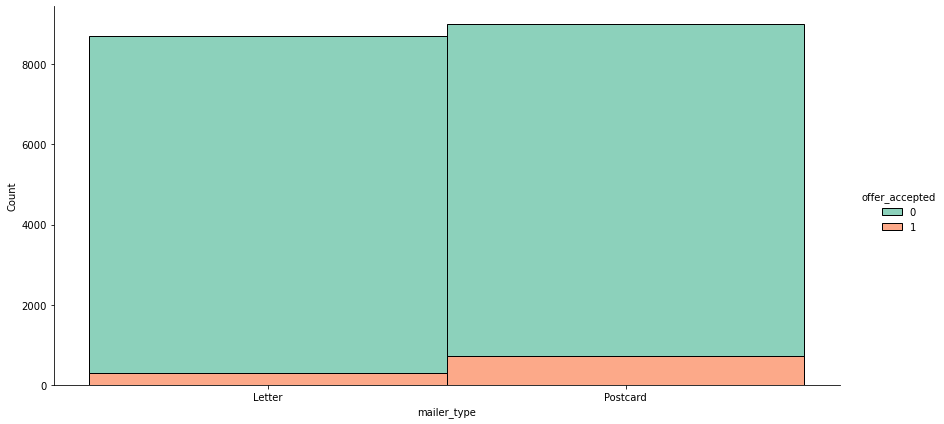

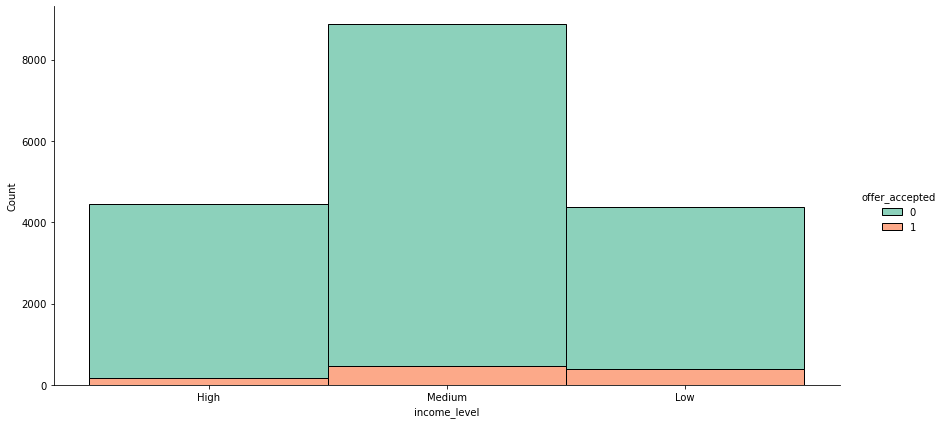

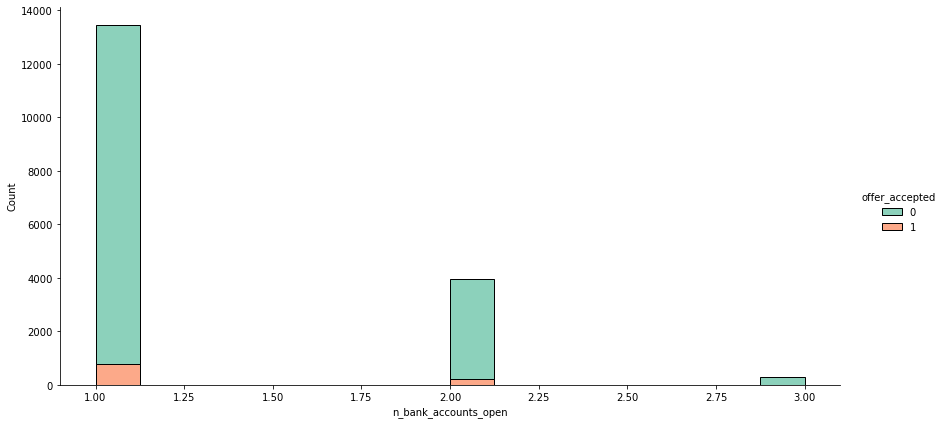

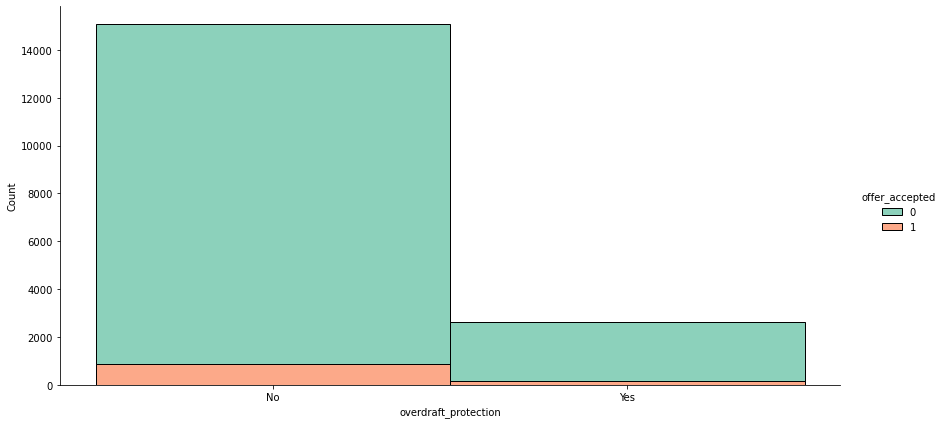

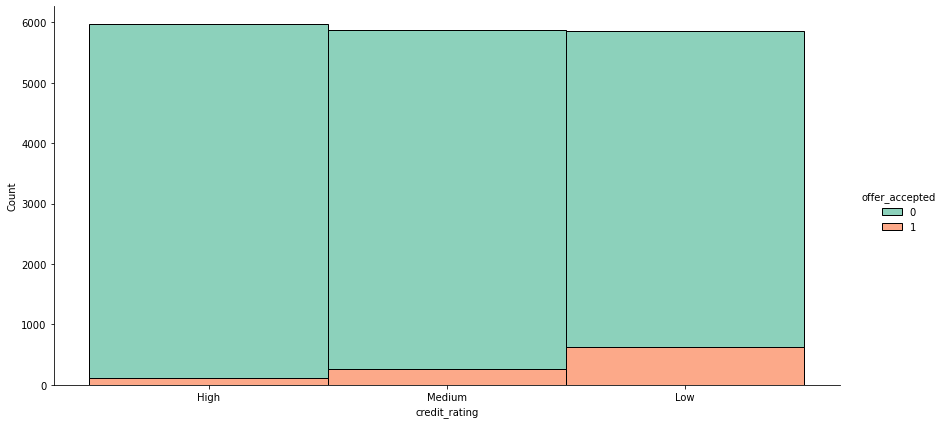

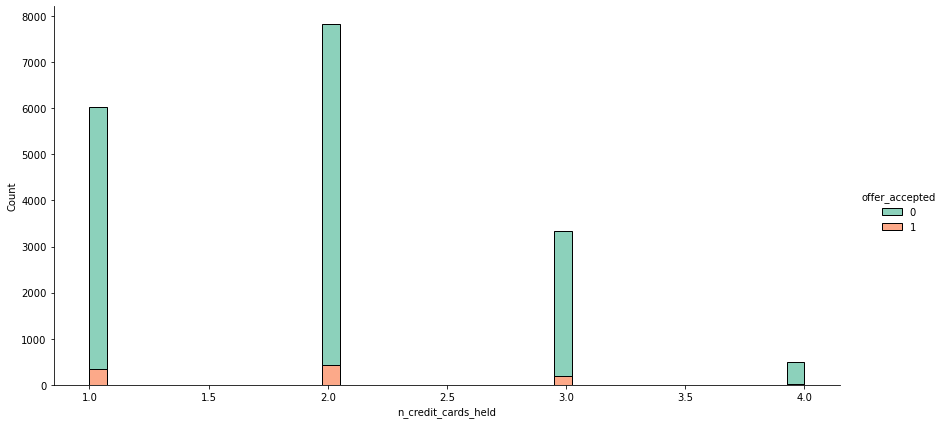

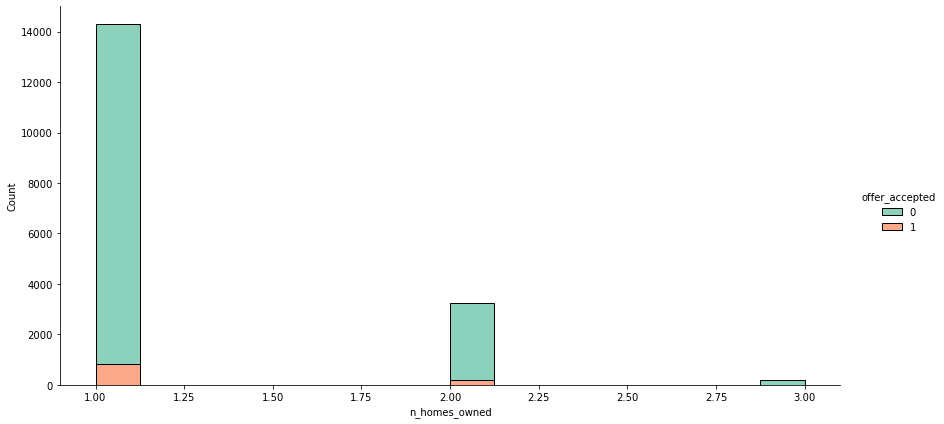

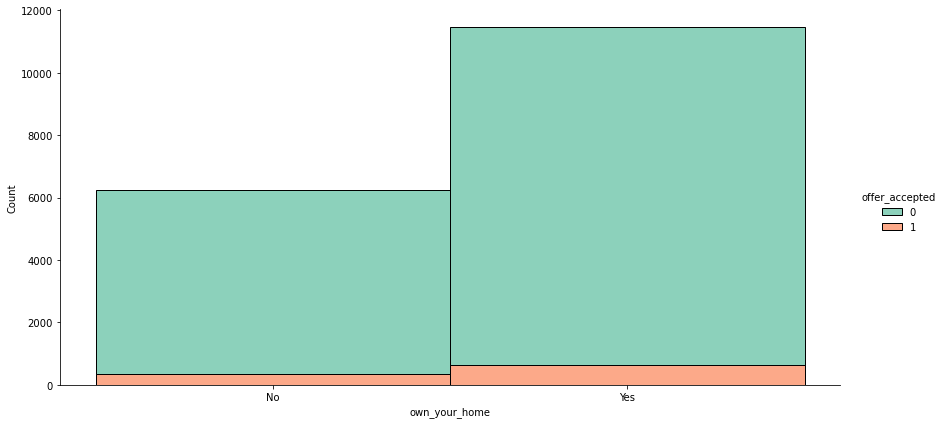

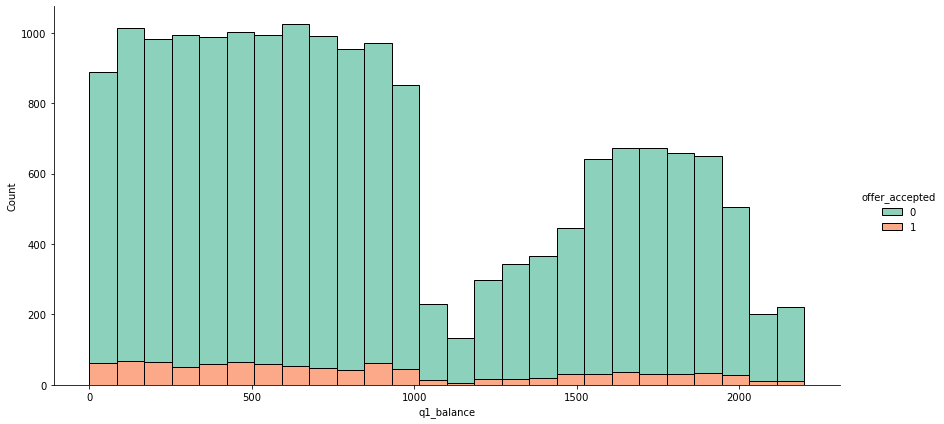

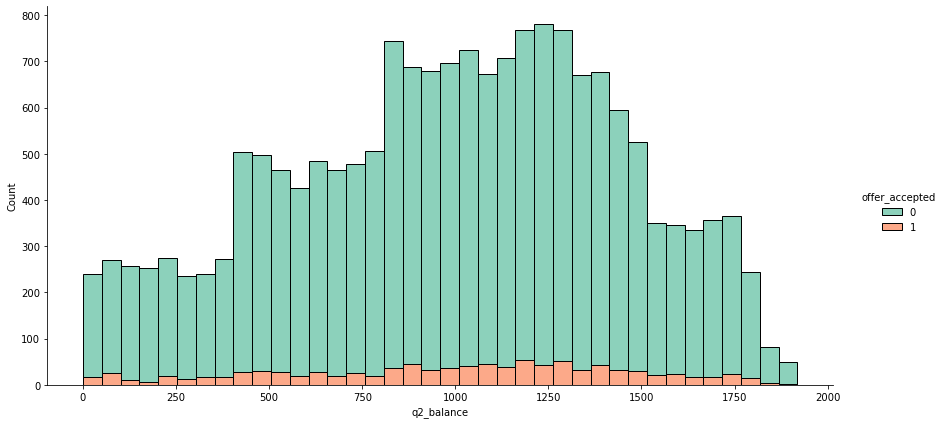

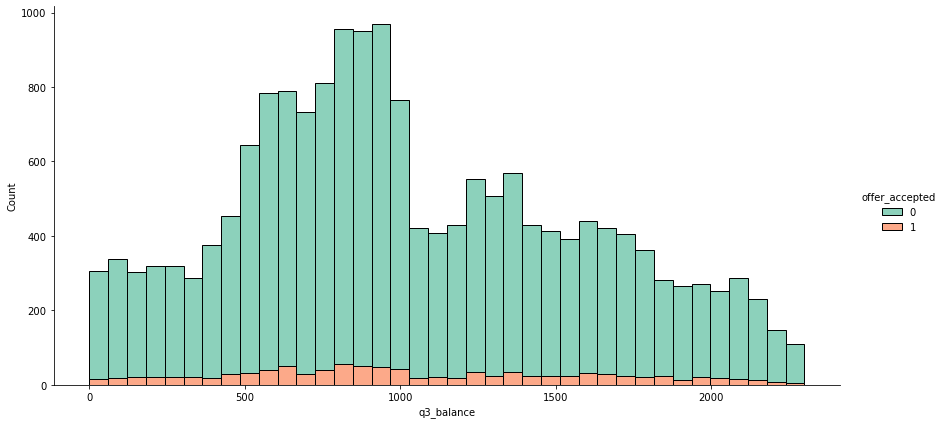

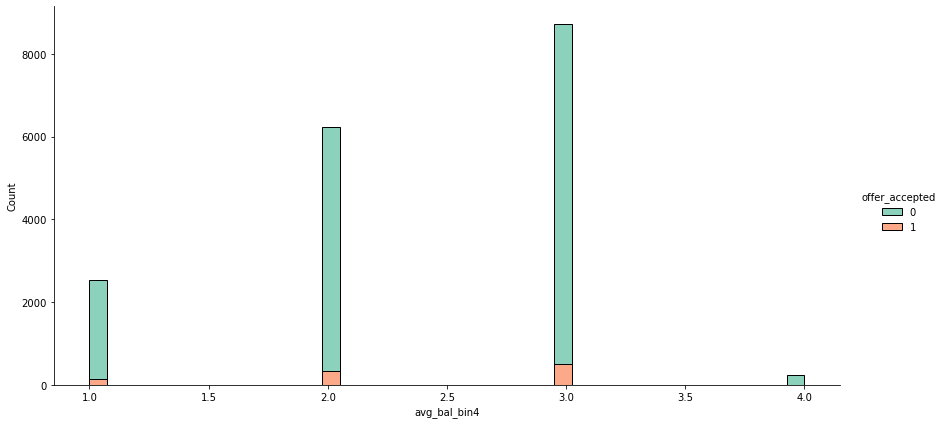

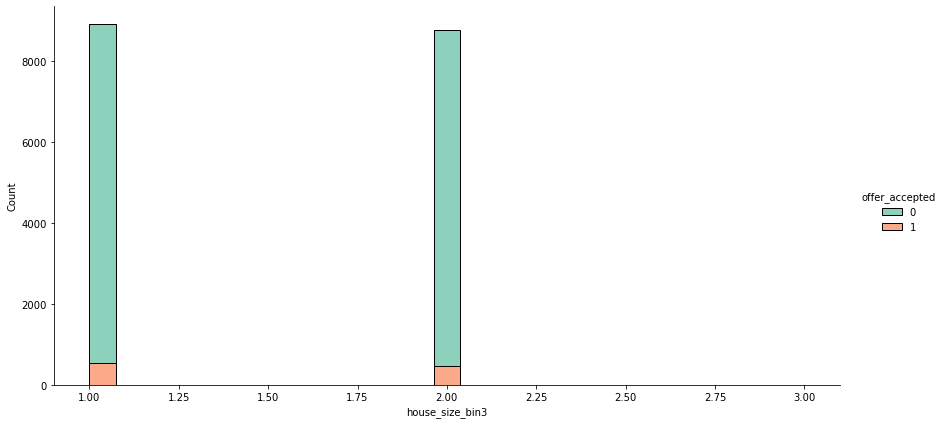

In [51]:
plot_df(data,'displot_hue_offer')

### Feature SELECTION: Drop a row by condition

In [52]:
data.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'n_bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'n_credit_cards_held', 'n_homes_owned', 'own_your_home', 'q1_balance',
       'q2_balance', 'q3_balance', 'avg_bal_bin4', 'house_size_bin3'],
      dtype='object')

In [53]:
#data = data[data['n_credit_cards_held'] != 1]
#data = data[data['credit_rating'] != 'High']
#data = data[data['reward'] != 'Cash Back']
#data = data[data['overdraft_protection'] != "Yes"]


In [54]:
data['n_credit_cards_held'].value_counts()

2    5154
1    3995
3    2235
4     347
Name: n_credit_cards_held, dtype: int64

In [55]:
data['credit_rating'].value_counts()

Medium    5870
Low       5861
Name: credit_rating, dtype: int64

#### Defining x, y split:

In [56]:
X = data.drop(['offer_accepted'], axis = 1)
y = data['offer_accepted']


In [57]:
data = data.drop('offer_accepted', axis = 1)

#### Encoding

In [58]:
#Encode: ORDINALLY

def ordcat(data):
    cols=list(data)
    
    for col in cols:
        if ( col == "income_level"):  
            income_dict = {"Low" : 0, "Medium" : 1, "High" : 2}
            data['income_level'] = data.income_level.map(income_dict)
            print(col, " column ordinally encoded!")

        elif ( col == "credit_rating"):  
            credit_rat_dict = {"Low" : 0, "Medium" : 1, "High" : 2}
            data["credit_rating"] = data.credit_rating.map(credit_rat_dict)
            print(col, " column ordinally encoded!")
        
            
            
    return data
data = ordcat(data)

income_level  column ordinally encoded!
credit_rating  column ordinally encoded!


In [59]:
#Encode: DUMMIES

data=pd.get_dummies(data,drop_first=True)
print("data encoded with dummies!") 

data encoded with dummies!


#### CHECKING DATA

In [60]:
data.head(3)

,income_level,n_bank_accounts_open,credit_rating,n_credit_cards_held,n_homes_owned,q1_balance,q2_balance,q3_balance,avg_bal_bin4,house_size_bin3,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,
2,1,1,1,2,2,39.0,106.0,78.0,1.0,2.0,0,0,0,0,1
3,2,2,1,2,1,367.0,352.0,145.0,1.0,1.0,0,0,1,0,1
5,1,1,1,2,1,2140.0,1357.0,982.0,3.0,2.0,0,0,0,0,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11731 entries, 2 to 18000
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   income_level              11731 non-null  int64  
 1   n_bank_accounts_open      11731 non-null  int64  
 2   credit_rating             11731 non-null  int64  
 3   n_credit_cards_held       11731 non-null  int64  
 4   n_homes_owned             11731 non-null  int64  
 5   q1_balance                11731 non-null  float64
 6   q2_balance                11731 non-null  float64
 7   q3_balance                11731 non-null  float64
 8   avg_bal_bin4              11731 non-null  float64
 9   house_size_bin3           11731 non-null  float64
 10  reward_Cash Back          11731 non-null  uint8  
 11  reward_Points             11731 non-null  uint8  
 12  mailer_type_Postcard      11731 non-null  uint8  
 13  overdraft_protection_Yes  11731 non-null  uint8  
 14  own_yo

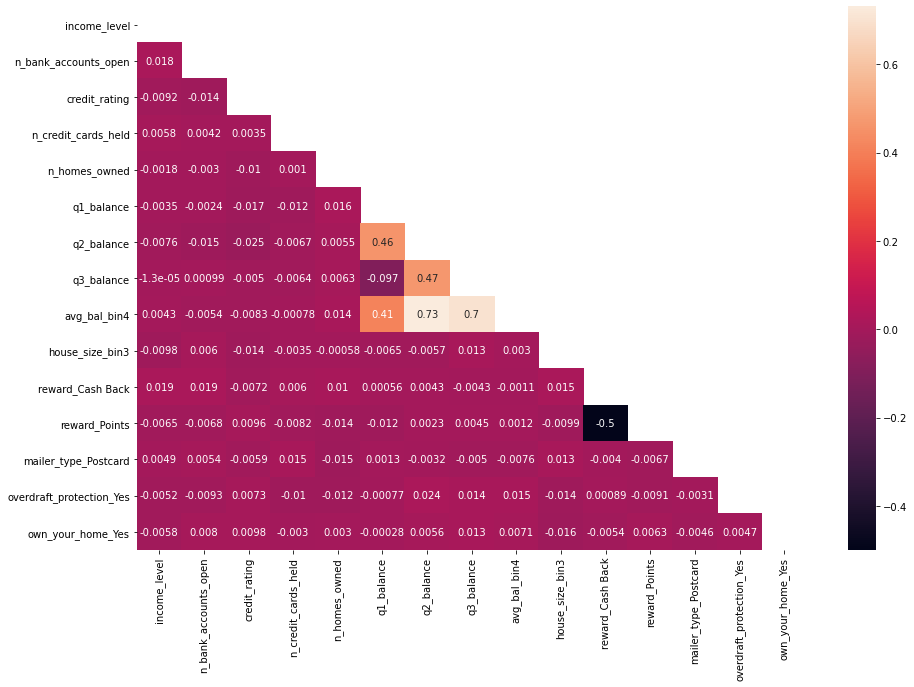

In [62]:
#### Correlation check

correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


----

##### SETS DF ready to play/test with

In [63]:
#Test MODEL 1
data1 = data.copy()
data1.head(3)

,income_level,n_bank_accounts_open,credit_rating,n_credit_cards_held,n_homes_owned,q1_balance,q2_balance,q3_balance,avg_bal_bin4,house_size_bin3,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,
2,1,1,1,2,2,39.0,106.0,78.0,1.0,2.0,0,0,0,0,1
3,2,2,1,2,1,367.0,352.0,145.0,1.0,1.0,0,0,1,0,1
5,1,1,1,2,1,2140.0,1357.0,982.0,3.0,2.0,0,0,0,0,1


In [64]:
X = data

-----
### Modeling

In [65]:
def classification_model(X,y,tomek,balancer,scaler,neighbors):
    
    tl = TomekLinks('majority')
    rus = RandomUnderSampler()
    Ros = RandomOverSampler()
    smote = SMOTE()
    ftwo_scorer = make_scorer(cohen_kappa_score)

#Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Scaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="MinMax":
        scaler_x = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="Normalizer":
        scaler_x = Normalizer().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="power":
        pt = PowerTransformer()
        powertrain=pt.fit(X_train)
        powertrainl=(pt.lambdas_)
        powertrain=pt.transform(X_train)
        X_train_scaled=pd.DataFrame(powertrain,columns=X_train.columns)
        powertest=pt.transform(X_test)
        X_test_scaled=pd.DataFrame(powertest,columns=X_test.columns)
    elif scaler=="None":
        X_train_scaled=X_train
        X_test_scaled=X_test

#sample balance
    if tomek=="tomek applied":
        X_train_scaled_tom, y_train_scaled_tom=tl.fit_sample(X_train_scaled, y_train)
    elif tomek=="tomek not applied":
        X_train_scaled_tom,y_train_scaled_tom=X_train_scaled,y_train
    if balancer=="smote sample":
        X_train_scaled_bal, y_train_scaled_bal = smote.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="over sample":
        X_train_scaled_bal, y_train_scaled_bal = Ros.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="under sample":
        X_train_scaled_bal, y_train_scaled_bal = rus.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="unbalanced":
        X_train_scaled_bal,y_train_scaled_bal=X_train_scaled_tom,y_train_scaled_tom

#models
    #Class
    log_ = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', class_weight = {'Yes': 0.2, 'No': 0.8}, C= 1)
    log_classification = log_.fit(X_train_scaled_bal, y_train_scaled_bal)
    log_predictions = log_classification.predict(X_test_scaled)
    #grid = GridSearchCV(LogisticRegression(), param_grid={'solver': ['lbfgs', 'saga'], 'C': [1,0.1,0.001], 'class_weight':[{'Yes': 0.2, 'No': 0.8},'balanced',None,{'Yes': 0.1, 'No': 1.6}]},scoring=ftwo_scorer, n_jobs =2)
    #grid.fit(X_train_scaled_bal, y_train_scaled_bal)
    #print(grid.best_params_,grid.best_score_,grid.best_estimator_)
    #KNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn_classification = knn.fit(X_train_scaled_bal, y_train_scaled_bal)
    knn_predictions = knn.predict(X_test_scaled)
    #gridknn = GridSearchCV(KNeighborsClassifier(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
    #gridknn.fit(X_train_scaled_bal, y_train_scaled_bal)
    #print(gridknn.best_params_,gridknn.best_score_,gridknn.best_estimator_)
    #Forest
    clf = RandomForestClassifier(n_estimators=200, class_weight = {'Yes': 0.2, 'No': 0.8})
    clf_classification = clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    clf_predictions = clf.predict(X_test_scaled)
    #gridf = GridSearchCV(RandomForestClassifier(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
    #gridf.fit(X_train_scaled_bal, y_train_scaled_bal)
    #print(gridf.best_params_,gridf.best_score_,gridf.best_estimator_)
    #AdaBoost
    ada_clf = AdaBoostClassifier()
    ada_clf_classification = ada_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    ada_clf_predictions = ada_clf.predict(X_test_scaled)
    #gridada = GridSearchCV(AdaBoostClassifier(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
    #gridada.fit(X_train_scaled_bal, y_train_scaled_bal)
    #print(gridada.best_params_,gridada.best_score_,gridada.best_estimator_)
    #SVC
    svc_clf = svm.SVC()
    svc_clf_classification = svc_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    svc_clf_predictions = svc_clf.predict(X_test_scaled)
    #gridsvc = GridSearchCV(svm.SVC(), param_grid={},scoring=ftwo_scorer, n_jobs =2)
    #gridsvc.fit(X_train_scaled_bal, y_train_scaled_bal)
    #print(gridsvc.best_params_,gridsvc.best_score_,gridsvc.best_estimator_)

#printing results
    print("| Logistic Regression Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, log_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, log_predictions)))
    print(cohen_kappa_score)
    print(confusion_matrix(y_test, log_predictions))
    plot_confusion_matrix(log_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, log_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, log_predictions))    
    print(" =================================================================== ")
    
    print("| KNN Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler,", KNN N", neighbors)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, knn_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, knn_predictions)))
    print(confusion_matrix(y_test, knn_predictions))
    plot_confusion_matrix(knn_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, knn_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, knn_predictions))
    print(" =================================================================== ")
    
    print("| Random Forest Classifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, clf_predictions)))
    print(confusion_matrix(y_test, clf_predictions))
    plot_confusion_matrix(clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, clf_predictions))
    print(" =================================================================== ")
    
    print("| AdaBoostClassifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, ada_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, ada_clf_predictions)))
    print(confusion_matrix(y_test, ada_clf_predictions))
    plot_confusion_matrix(ada_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, ada_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, ada_clf_predictions))
    print(" =================================================================== ")
    
    print("| Support Vector Machines Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, svc_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, svc_clf_predictions)))
    print(confusion_matrix(y_test, svc_clf_predictions))
    plot_confusion_matrix(svc_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, svc_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, svc_clf_predictions))
    return 

-----

### Classification Model Evaluation

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.88 
The Kappa of your model is: 0.06
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3084  171]
 [ 238   27]]


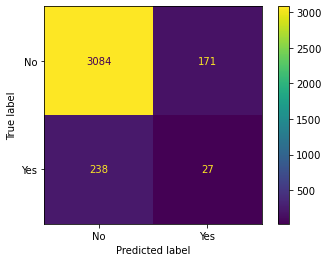

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.95      0.94      3255
         Yes       0.14      0.10      0.12       265

    accuracy                           0.88      3520
   macro avg       0.53      0.52      0.53      3520
weighted avg       0.87      0.88      0.88      3520

matthews_corrcoef:  0.05651618102965324
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None , KNN N 2
The accuracy of the model on test set is: 0.78 
The Kappa of your model is: 0.00
[[2697  558]
 [ 218   47]]


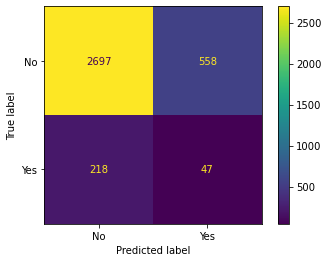

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.83      0.87      3255
         Yes       0.08      0.18      0.11       265

    accuracy                           0.78      3520
   macro avg       0.50      0.50      0.49      3520
weighted avg       0.86      0.78      0.82      3520

matthews_corrcoef:  0.004147154716596918
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.87 
The Kappa of your model is: 0.04
[[3045  210]
 [ 239   26]]


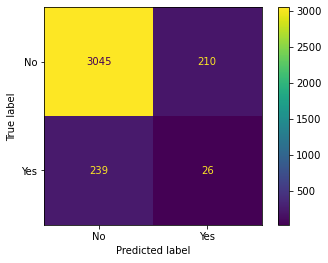

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.94      0.93      3255
         Yes       0.11      0.10      0.10       265

    accuracy                           0.87      3520
   macro avg       0.52      0.52      0.52      3520
weighted avg       0.87      0.87      0.87      3520

matthews_corrcoef:  0.03544397095572185
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.82 
The Kappa of your model is: 0.09
[[2838  417]
 [ 199   66]]


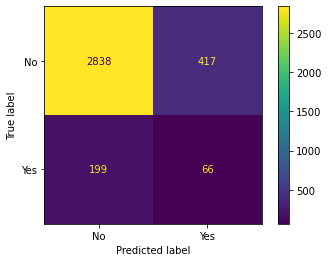

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.87      0.90      3255
         Yes       0.14      0.25      0.18       265

    accuracy                           0.82      3520
   macro avg       0.54      0.56      0.54      3520
weighted avg       0.87      0.82      0.85      3520

matthews_corrcoef:  0.09274574596027622
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.65 
The Kappa of your model is: 0.00
[[2196 1059]
 [ 177   88]]


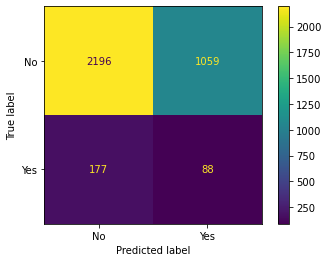

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.67      0.78      3255
         Yes       0.08      0.33      0.12       265

    accuracy                           0.65      3520
   macro avg       0.50      0.50      0.45      3520
weighted avg       0.86      0.65      0.73      3520

matthews_corrcoef:  0.0037885516513511113


In [66]:
classification_model(X,y,"tomek applied","smote sample","None",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.10
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3119  136]
 [ 231   34]]


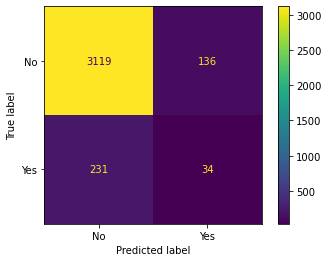

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.96      0.94      3255
         Yes       0.20      0.13      0.16       265

    accuracy                           0.90      3520
   macro avg       0.57      0.54      0.55      3520
weighted avg       0.88      0.90      0.89      3520

matthews_corrcoef:  0.10648002489200087
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.83 
The Kappa of your model is: 0.03
[[2881  374]
 [ 226   39]]


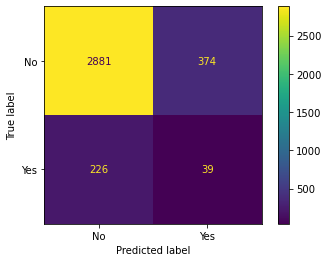

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.89      0.91      3255
         Yes       0.09      0.15      0.12       265

    accuracy                           0.83      3520
   macro avg       0.51      0.52      0.51      3520
weighted avg       0.86      0.83      0.85      3520

matthews_corrcoef:  0.02645739856538093
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.02
[[3153  102]
 [ 252   13]]


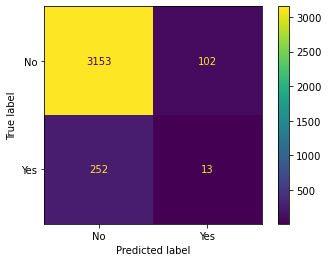

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      3255
         Yes       0.11      0.05      0.07       265

    accuracy                           0.90      3520
   macro avg       0.52      0.51      0.51      3520
weighted avg       0.86      0.90      0.88      3520

matthews_corrcoef:  0.026300229082820707
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.81 
The Kappa of your model is: 0.11
[[2775  480]
 [ 180   85]]


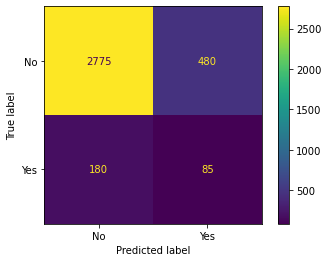

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.85      0.89      3255
         Yes       0.15      0.32      0.20       265

    accuracy                           0.81      3520
   macro avg       0.54      0.59      0.55      3520
weighted avg       0.88      0.81      0.84      3520

matthews_corrcoef:  0.12455671968057648
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.74 
The Kappa of your model is: 0.09
[[2492  763]
 [ 154  111]]


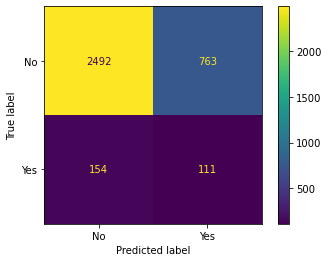

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.77      0.84      3255
         Yes       0.13      0.42      0.19       265

    accuracy                           0.74      3520
   macro avg       0.53      0.59      0.52      3520
weighted avg       0.88      0.74      0.80      3520

matthews_corrcoef:  0.11265446412926822


In [67]:
classification_model(X,y,"tomek applied","smote sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.09
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3122  133]
 [ 234   31]]


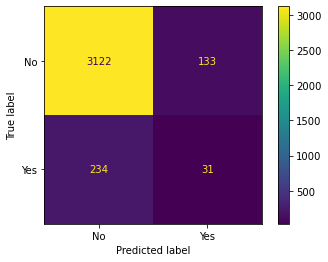

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.96      0.94      3255
         Yes       0.19      0.12      0.14       265

    accuracy                           0.90      3520
   macro avg       0.56      0.54      0.54      3520
weighted avg       0.87      0.90      0.88      3520

matthews_corrcoef:  0.09529487503317507
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.83 
The Kappa of your model is: 0.03
[[2879  376]
 [ 226   39]]


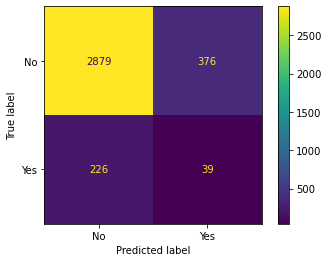

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.88      0.91      3255
         Yes       0.09      0.15      0.11       265

    accuracy                           0.83      3520
   macro avg       0.51      0.52      0.51      3520
weighted avg       0.86      0.83      0.85      3520

matthews_corrcoef:  0.02589935191886566
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.03
[[3159   96]
 [ 252   13]]


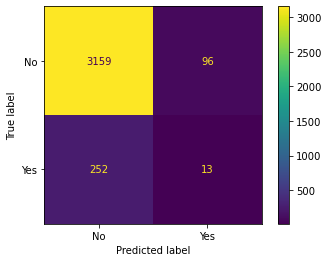

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      3255
         Yes       0.12      0.05      0.07       265

    accuracy                           0.90      3520
   macro avg       0.52      0.51      0.51      3520
weighted avg       0.87      0.90      0.88      3520

matthews_corrcoef:  0.029798282930950874
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.84 
The Kappa of your model is: 0.11
[[2883  372]
 [ 195   70]]


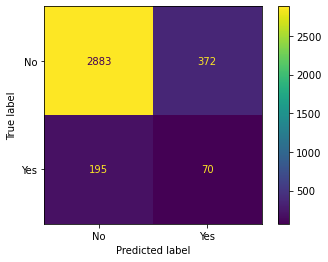

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.89      0.91      3255
         Yes       0.16      0.26      0.20       265

    accuracy                           0.84      3520
   macro avg       0.55      0.57      0.55      3520
weighted avg       0.88      0.84      0.86      3520

matthews_corrcoef:  0.11933116291540123
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.75 
The Kappa of your model is: 0.09
[[2522  733]
 [ 159  106]]


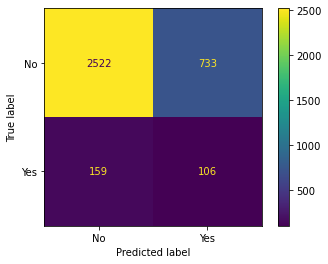

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.77      0.85      3255
         Yes       0.13      0.40      0.19       265

    accuracy                           0.75      3520
   macro avg       0.53      0.59      0.52      3520
weighted avg       0.88      0.75      0.80      3520

matthews_corrcoef:  0.10825060182253418


In [68]:
classification_model(X,y,"tomek applied","smote sample","power",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.92 
The Kappa of your model is: 0.00
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3255    0]
 [ 265    0]]


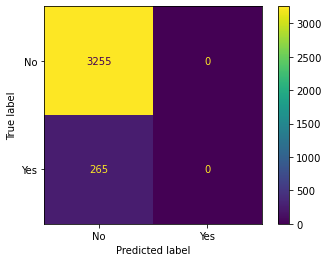

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.92      1.00      0.96      3255
         Yes       0.00      0.00      0.00       265

    accuracy                           0.92      3520
   macro avg       0.46      0.50      0.48      3520
weighted avg       0.86      0.92      0.89      3520

matthews_corrcoef:  0.0
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer , KNN N 2
The accuracy of the model on test set is: 0.75 
The Kappa of your model is: -0.01
[[2605  650]
 [ 216   49]]


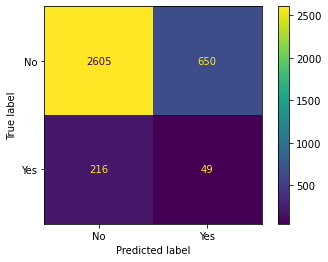

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.92      0.80      0.86      3255
         Yes       0.07      0.18      0.10       265

    accuracy                           0.75      3520
   macro avg       0.50      0.49      0.48      3520
weighted avg       0.86      0.75      0.80      3520

matthews_corrcoef:  -0.00978006854414256
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.02
[[3176   79]
 [ 255   10]]


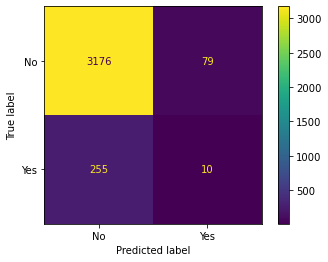

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      3255
         Yes       0.11      0.04      0.06       265

    accuracy                           0.91      3520
   macro avg       0.52      0.51      0.50      3520
weighted avg       0.86      0.91      0.88      3520

matthews_corrcoef:  0.022631608324438404
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.83 
The Kappa of your model is: 0.09
[[2869  386]
 [ 202   63]]


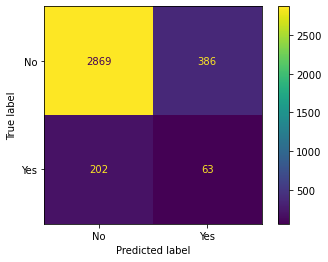

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.88      0.91      3255
         Yes       0.14      0.24      0.18       265

    accuracy                           0.83      3520
   macro avg       0.54      0.56      0.54      3520
weighted avg       0.87      0.83      0.85      3520

matthews_corrcoef:  0.09423798106523361
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  Normalizer
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: -0.00
[[2145 1110]
 [ 177   88]]


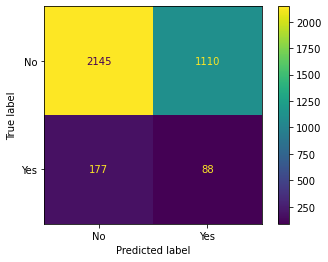

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.92      0.66      0.77      3255
         Yes       0.07      0.33      0.12       265

    accuracy                           0.63      3520
   macro avg       0.50      0.50      0.44      3520
weighted avg       0.86      0.63      0.72      3520

matthews_corrcoef:  -0.004977329910791809


In [69]:
classification_model(X,y,"tomek applied","smote sample","Normalizer",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.09
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3139  116]
 [ 236   29]]


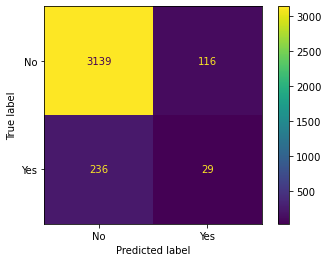

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.96      0.95      3255
         Yes       0.20      0.11      0.14       265

    accuracy                           0.90      3520
   macro avg       0.57      0.54      0.54      3520
weighted avg       0.88      0.90      0.89      3520

matthews_corrcoef:  0.09797453238742122
| KNN Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.73 
The Kappa of your model is: 0.04
[[2478  777]
 [ 180   85]]


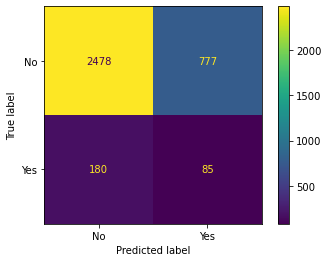

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.76      0.84      3255
         Yes       0.10      0.32      0.15       265

    accuracy                           0.73      3520
   macro avg       0.52      0.54      0.49      3520
weighted avg       0.87      0.73      0.79      3520

matthews_corrcoef:  0.05034074529233357
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.59 
The Kappa of your model is: 0.09
[[1881 1374]
 [  80  185]]


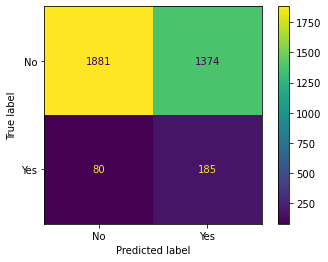

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.58      0.72      3255
         Yes       0.12      0.70      0.20       265

    accuracy                           0.59      3520
   macro avg       0.54      0.64      0.46      3520
weighted avg       0.90      0.59      0.68      3520

matthews_corrcoef:  0.14660043631125366
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.62 
The Kappa of your model is: 0.08
[[2008 1247]
 [ 103  162]]


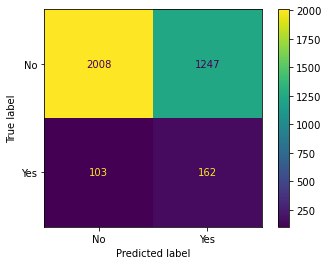

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.62      0.75      3255
         Yes       0.11      0.61      0.19       265

    accuracy                           0.62      3520
   macro avg       0.53      0.61      0.47      3520
weighted avg       0.89      0.62      0.71      3520

matthews_corrcoef:  0.12289901536875611
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.09
[[1964 1291]
 [  85  180]]


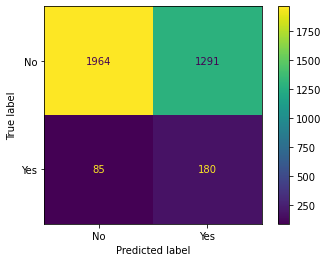

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.96      0.60      0.74      3255
         Yes       0.12      0.68      0.21       265

    accuracy                           0.61      3520
   macro avg       0.54      0.64      0.47      3520
weighted avg       0.90      0.61      0.70      3520

matthews_corrcoef:  0.15119284217965145


In [70]:
classification_model(X,y,"tomek applied","under sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.08
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3158   97]
 [ 241   24]]


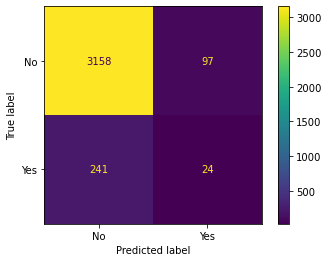

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      3255
         Yes       0.20      0.09      0.12       265

    accuracy                           0.90      3520
   macro avg       0.56      0.53      0.54      3520
weighted avg       0.87      0.90      0.89      3520

matthews_corrcoef:  0.0880012597668332
| KNN Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.85 
The Kappa of your model is: 0.01
[[2964  291]
 [ 237   28]]


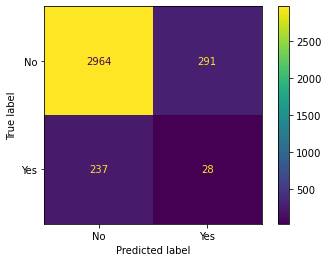

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.91      0.92      3255
         Yes       0.09      0.11      0.10       265

    accuracy                           0.85      3520
   macro avg       0.51      0.51      0.51      3520
weighted avg       0.86      0.85      0.86      3520

matthews_corrcoef:  0.014943979320428617
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.03
[[3211   44]
 [ 257    8]]


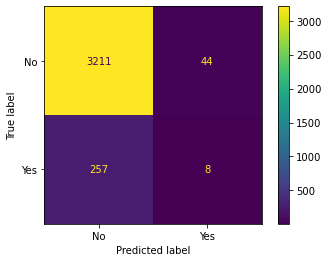

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.99      0.96      3255
         Yes       0.15      0.03      0.05       265

    accuracy                           0.91      3520
   macro avg       0.54      0.51      0.50      3520
weighted avg       0.87      0.91      0.89      3520

matthews_corrcoef:  0.036460215933213164
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.65 
The Kappa of your model is: 0.10
[[2133 1122]
 [ 104  161]]


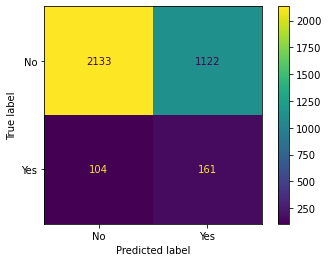

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.66      0.78      3255
         Yes       0.13      0.61      0.21       265

    accuracy                           0.65      3520
   macro avg       0.54      0.63      0.49      3520
weighted avg       0.89      0.65      0.73      3520

matthews_corrcoef:  0.14409690633951608
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.67 
The Kappa of your model is: 0.09
[[2222 1033]
 [ 122  143]]


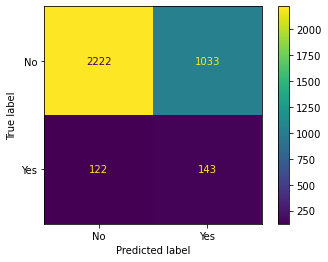

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.95      0.68      0.79      3255
         Yes       0.12      0.54      0.20       265

    accuracy                           0.67      3520
   macro avg       0.53      0.61      0.50      3520
weighted avg       0.89      0.67      0.75      3520

matthews_corrcoef:  0.1243330313762517


In [71]:
classification_model(X,y,"tomek applied","over sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.08
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3137  118]
 [ 238   27]]


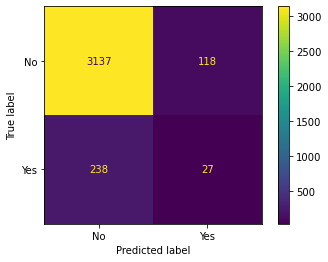

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.96      0.95      3255
         Yes       0.19      0.10      0.13       265

    accuracy                           0.90      3520
   macro avg       0.56      0.53      0.54      3520
weighted avg       0.87      0.90      0.88      3520

matthews_corrcoef:  0.08713892311859009
| KNN Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.85 
The Kappa of your model is: 0.04
[[2945  310]
 [ 228   37]]


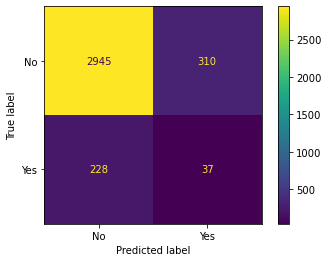

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.90      0.92      3255
         Yes       0.11      0.14      0.12       265

    accuracy                           0.85      3520
   macro avg       0.52      0.52      0.52      3520
weighted avg       0.87      0.85      0.86      3520

matthews_corrcoef:  0.03928533352407708
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.91 
The Kappa of your model is: 0.02
[[3193   62]
 [ 256    9]]


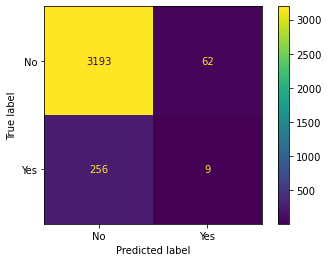

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      3255
         Yes       0.13      0.03      0.05       265

    accuracy                           0.91      3520
   macro avg       0.53      0.51      0.50      3520
weighted avg       0.87      0.91      0.88      3520

matthews_corrcoef:  0.027992106742910867
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.84 
The Kappa of your model is: 0.13
[[2863  392]
 [ 188   77]]


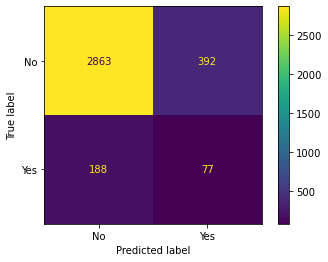

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.88      0.91      3255
         Yes       0.16      0.29      0.21       265

    accuracy                           0.84      3520
   macro avg       0.55      0.59      0.56      3520
weighted avg       0.88      0.84      0.86      3520

matthews_corrcoef:  0.13209517305090354
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.74 
The Kappa of your model is: 0.09
[[2512  743]
 [ 157  108]]


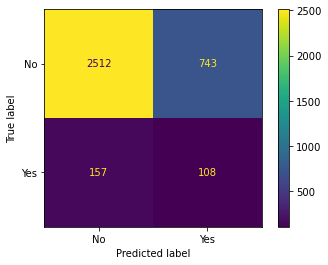

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.77      0.85      3255
         Yes       0.13      0.41      0.19       265

    accuracy                           0.74      3520
   macro avg       0.53      0.59      0.52      3520
weighted avg       0.88      0.74      0.80      3520

matthews_corrcoef:  0.1104837439100331


In [72]:
classification_model(X,y,"tomek not applied","smote sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.08
<function cohen_kappa_score at 0x000001F23D12DDC0>
[[3138  117]
 [ 238   27]]


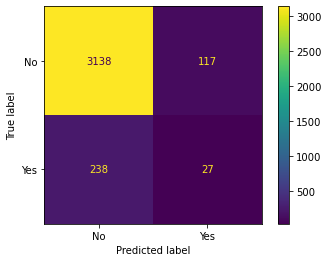

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.96      0.95      3255
         Yes       0.19      0.10      0.13       265

    accuracy                           0.90      3520
   macro avg       0.56      0.53      0.54      3520
weighted avg       0.87      0.90      0.89      3520

matthews_corrcoef:  0.08783724166858599
| KNN Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.84 
The Kappa of your model is: 0.02
[[2934  321]
 [ 233   32]]


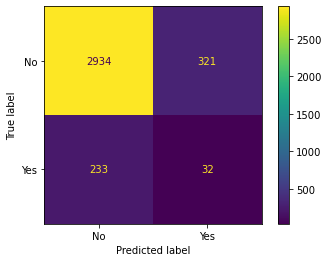

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.90      0.91      3255
         Yes       0.09      0.12      0.10       265

    accuracy                           0.84      3520
   macro avg       0.51      0.51      0.51      3520
weighted avg       0.86      0.84      0.85      3520

matthews_corrcoef:  0.019445084955072245
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.90 
The Kappa of your model is: 0.02
[[3173   82]
 [ 254   11]]


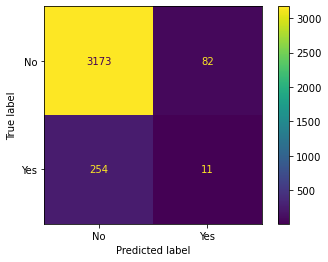

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      3255
         Yes       0.12      0.04      0.06       265

    accuracy                           0.90      3520
   macro avg       0.52      0.51      0.51      3520
weighted avg       0.87      0.90      0.88      3520

matthews_corrcoef:  0.02684426043814506
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.82 
The Kappa of your model is: 0.13
[[2800  455]
 [ 177   88]]


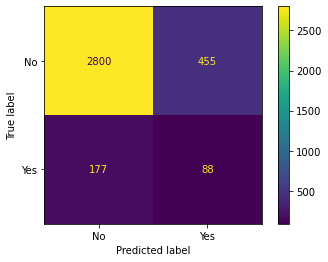

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.86      0.90      3255
         Yes       0.16      0.33      0.22       265

    accuracy                           0.82      3520
   macro avg       0.55      0.60      0.56      3520
weighted avg       0.88      0.82      0.85      3520

matthews_corrcoef:  0.1404646325762704
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.76 
The Kappa of your model is: 0.09
[[2581  674]
 [ 165  100]]


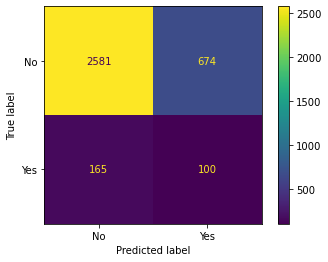

------ Classification_Report------ 
              precision    recall  f1-score   support

          No       0.94      0.79      0.86      3255
         Yes       0.13      0.38      0.19       265

    accuracy                           0.76      3520
   macro avg       0.53      0.59      0.53      3520
weighted avg       0.88      0.76      0.81      3520

matthews_corrcoef:  0.1084858386420856


In [73]:
classification_model(X,y,"tomek not applied","smote sample","power",2)